# Часть 1 Бустинг (5 баллов)

В этой части будем предсказывать зарплату data scientist-ов в зависимости  от ряда факторов с помощью градиентного бустинга.

В датасете есть следующие признаки:



* work_year: The number of years of work experience in the field of data science.

* experience_level: The level of experience, such as Junior, Senior, or Lead.

* employment_type: The type of employment, such as Full-time or Contract.

* job_title: The specific job title or role, such as Data Analyst or Data Scientist.

* salary: The salary amount for the given job.

* salary_currency: The currency in which the salary is denoted.

* salary_in_usd: The equivalent salary amount converted to US dollars (USD) for comparison purposes.

* employee_residence: The country or region where the employee resides.

* remote_ratio: The percentage of remote work offered in the job.

* company_location: The location of the company or organization.

* company_size: The company's size is categorized as Small, Medium, or Large.

In [ ]:
import pandas as pd

df = pd.read_csv("https://raw.githubusercontent.com/hse-ds/iad-intro-ds/master/2024/homeworks/hw08_boosting_clustering/ds_salaries.csv")
df.head()

work_year experience_level employment_type                 job_title  \
0       2023               SE              FT  Principal Data Scientist   
1       2023               MI              CT               ML Engineer   
2       2023               MI              CT               ML Engineer   
3       2023               SE              FT            Data Scientist   
4       2023               SE              FT            Data Scientist   

   salary salary_currency  salary_in_usd employee_residence  remote_ratio  \
0   80000             EUR          85847                 ES           100   
1   30000             USD          30000                 US           100   
2   25500             USD          25500                 US           100   
3  175000             USD         175000                 CA           100   
4  120000             USD         120000                 CA           100   

  company_location company_size  
0               ES            L  
1               US            S  
2               US            S  
3               CA            M  
4               CA            M

## Задание 1 (0.5 балла) Подготовка



*   Разделите выборку на train, val, test (80%, 10%, 10%)
*   Выдерите salary_in_usd в качестве таргета
*   Найдите и удалите признак, из-за которого возможен лик в данных


In [ ]:
from sklearn.model_selection import train_test_split

df.drop("salary", axis=1, inplace=True)

In [ ]:
X_train, new = train_test_split(df, train_size=0.8)

X_val, X_test = train_test_split(new, train_size=0.5)

X_train = X_train.reset_index().iloc[:, 1:]
X_val = X_val.reset_index().iloc[:, 1:]
X_test = X_test.reset_index().iloc[:, 1:]

In [ ]:
y_train, y_val, y_test = X_train["salary_in_usd"], X_val["salary_in_usd"], X_test["salary_in_usd"]

In [ ]:
X_train.drop("salary_in_usd", axis=1, inplace=True)
X_val.drop("salary_in_usd", axis=1, inplace=True)
X_test.drop("salary_in_usd", axis=1, inplace=True)

fut_train = X_train
fut_val = X_val
fut_test = X_test

## Задание 2 (0.5 балла) Линейная модель


*   Закодируйте категориальные  признаки с помощью OneHotEncoder
*   Обучите модель линейной регрессии
*   Оцените  качество через MAPE и RMSE


In [ ]:
df

work_year experience_level employment_type                 job_title  \
0          2023               SE              FT  Principal Data Scientist   
1          2023               MI              CT               ML Engineer   
2          2023               MI              CT               ML Engineer   
3          2023               SE              FT            Data Scientist   
4          2023               SE              FT            Data Scientist   
...         ...              ...             ...                       ...   
3750       2020               SE              FT            Data Scientist   
3751       2021               MI              FT  Principal Data Scientist   
3752       2020               EN              FT            Data Scientist   
3753       2020               EN              CT     Business Data Analyst   
3754       2021               SE              FT      Data Science Manager   

     salary_currency  salary_in_usd employee_residence  remote_ratio  \
0                EUR          85847                 ES           100   
1                USD          30000                 US           100   
2                USD          25500                 US           100   
3                USD         175000                 CA           100   
4                USD         120000                 CA           100   
...              ...            ...                ...           ...   
3750             USD         412000                 US           100   
3751             USD         151000                 US           100   
3752             USD         105000                 US           100   
3753             USD         100000                 US           100   
3754             INR          94665                 IN            50   

     company_location company_size  
0                  ES            L  
1                  US            S  
2                  US            S  
3                  CA            M  
4                  CA            M  
...               ...          ...  
3750               US            L  
3751               US            L  
3752               US            S  
3753               US            L  
3754               IN            L  

[3755 rows x 10 columns]

In [ ]:
df.dtypes

work_year              int64
experience_level      object
employment_type       object
job_title             object
salary_currency       object
salary_in_usd          int64
employee_residence    object
remote_ratio           int64
company_location      object
company_size          object
dtype: object

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error
from sklearn.preprocessing import OneHotEncoder

categorical_features = X_train.select_dtypes(include="object").columns.values
num_features = X_train.select_dtypes(include="int64").columns.values

ohe = OneHotEncoder(sparse_output=False, handle_unknown="ignore")
ohe.fit(pd.concat([X_train[categorical_features], X_val[categorical_features], X_test[categorical_features]]))
enc_train = pd.DataFrame(ohe.transform(X_train[categorical_features]), columns=ohe.get_feature_names_out())
enc_val = pd.DataFrame(ohe.transform(X_val[categorical_features]), columns=ohe.get_feature_names_out())
enc_test = pd.DataFrame(ohe.transform(X_test[categorical_features]), columns=ohe.get_feature_names_out())

X_train.drop(categorical_features, axis=1, inplace=True)
X_val.drop(categorical_features, axis=1, inplace=True)
X_test.drop(categorical_features, axis=1, inplace=True)

In [ ]:
X_train = pd.concat([X_train, enc_train], axis=1)
X_val = pd.concat([X_val, enc_val], axis=1)
X_test = pd.concat([X_test, enc_test], axis=1)

In [ ]:
X_train

work_year  remote_ratio  experience_level_EN  experience_level_EX  \
0          2020           100                  1.0                  0.0   
1          2022           100                  0.0                  0.0   
2          2022           100                  0.0                  1.0   
3          2023           100                  0.0                  0.0   
4          2022           100                  0.0                  0.0   
...         ...           ...                  ...                  ...   
2999       2023             0                  0.0                  0.0   
3000       2020            50                  0.0                  0.0   
3001       2023             0                  0.0                  0.0   
3002       2022            50                  0.0                  0.0   
3003       2023             0                  0.0                  0.0   

      experience_level_MI  experience_level_SE  employment_type_CT  \
0                     0.0                  0.0                 0.0   
1                     0.0                  1.0                 0.0   
2                     0.0                  0.0                 0.0   
3                     0.0                  1.0                 0.0   
4                     0.0                  1.0                 0.0   
...                   ...                  ...                 ...   
2999                  1.0                  0.0                 0.0   
3000                  0.0                  1.0                 0.0   
3001                  0.0                  1.0                 0.0   
3002                  1.0                  0.0                 0.0   
3003                  0.0                  1.0                 0.0   

      employment_type_FL  employment_type_FT  employment_type_PT  ...  \
0                    0.0                 1.0                 0.0  ...   
1                    0.0                 1.0                 0.0  ...   
2                    0.0                 1.0                 0.0  ...   
3                    0.0                 1.0                 0.0  ...   
4                    0.0                 1.0                 0.0  ...   
...                  ...                 ...                 ...  ...   
2999                 0.0                 1.0                 0.0  ...   
3000                 0.0                 1.0                 0.0  ...   
3001                 0.0                 1.0                 0.0  ...   
3002                 0.0                 1.0                 0.0  ...   
3003                 0.0                 1.0                 0.0  ...   

      company_location_SI  company_location_SK  company_location_TH  \
0                     0.0                  0.0                  0.0   
1                     0.0                  0.0                  0.0   
2                     0.0                  0.0                  0.0   
3                     0.0                  0.0                  0.0   
4                     0.0                  0.0                  0.0   
...                   ...                  ...                  ...   
2999                  0.0                  0.0                  0.0   
3000                  0.0                  0.0                  0.0   
3001                  0.0                  0.0                  0.0   
3002                  0.0                  0.0                  0.0   
3003                  0.0                  0.0                  0.0   

      company_location_TR  company_location_UA  company_location_US  \
0                     0.0                  0.0                  0.0   
1                     0.0                  0.0                  1.0   
2                     0.0                  0.0                  1.0   
3                     0.0                  0.0                  1.0   
4                     0.0                  0.0                  1.0   
...                   ...                  ...                  ...   
2999                  0.0            

In [ ]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)

res = linreg.predict(X_test)

print("MAPE: ", mean_absolute_percentage_error(res, y_test))
print("RMSE: ", mean_squared_error(res, y_test))

MAPE:  0.356579328103707
RMSE:  6.536789518363064e+25


## Задание 3 (0.5 балла) XGboost

Начнем с библиотеки xgboost.

Обучите модель `XGBRegressor` на тех же данных, что линейную модель, подобрав оптимальные гиперпараметры (`max_depth, learning_rate, n_estimators, gamma`, etc.) по валидационной выборке. Оцените качество итоговой модели (MAPE, RMSE), скорость обучения и скорость предсказания.

In [ ]:
from xgboost.sklearn import XGBRegressor
from sklearn.model_selection import GridSearchCV

params = {
    'max_depth' : [3, 4, 5, 10],
    'learning_rate' : [0.1, 0.2, 0.5, 1],
    'n_estimators' : [20, 40, 50]
}

xg = XGBRegressor()
best_params_xg = GridSearchCV(xg, params, cv=9)

best_params_xg.fit(pd.concat([X_train, X_val]), pd.concat([y_train, y_val]))

print(best_params_xg.best_params_)

{'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 50}


In [ ]:
best_rate_xg = list(best_params_xg.best_params_.values())[0]
best_depth_xg = list(best_params_xg.best_params_.values())[1]
best_n_xg = list(best_params_xg.best_params_.values())[2]

In [ ]:
%%time
xg = XGBRegressor(max_depth=best_depth_xg, learning_rate=best_rate_xg, n_estimators=best_n_xg)
xg.fit(X_train, y_train)

res = xg.predict(X_test)

print("MAPE: ", mean_absolute_percentage_error(res, y_test))
print("RMSE: ", mean_squared_error(res, y_test))

MAPE:  0.27496235168143535
RMSE:  2456254360.946735
CPU times: user 521 ms, sys: 2.83 ms, total: 523 ms
Wall time: 316 ms


## Задание 4 (1 балл) CatBoost

Теперь библиотека CatBoost.

Обучите модель `CatBoostRegressor`, подобрав оптимальные гиперпараметры (`depth, learning_rate, iterations`, etc.) по валидационной выборке. Оцените качество итоговой модели (MAPE, RMSE), скорость обучения и скорость предсказания.

In [ ]:
!pip3 install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 2.2 MB/s eta 0:00:00


In [ ]:
from catboost import CatBoostRegressor

params = {
    'max_depth' : [3, 4, 5, 10],
    'learning_rate' : [0.1, 0.2, 0.5, 1],
    'n_estimators' : [20, 40, 50]
}

cat = CatBoostRegressor()
best_params_cat = GridSearchCV(cat, params, cv=9)

best_params_cat.fit(pd.concat([X_train, X_val]), pd.concat([y_train, y_val]))

Выходные данные были обрезаны до нескольких последних строк (5000).
0:	learn: 54668.4896558	total: 15.2ms	remaining: 289ms
1:	learn: 50859.2702414	total: 18.9ms	remaining: 170ms
2:	learn: 49492.7900375	total: 25.5ms	remaining: 144ms
3:	learn: 48621.6300056	total: 41.8ms	remaining: 167ms
4:	learn: 47954.5269743	total: 61.1ms	remaining: 183ms
5:	learn: 47723.8336989	total: 69.9ms	remaining: 163ms
6:	learn: 47131.3933041	total: 91.1ms	remaining: 169ms
7:	learn: 46765.6789626	total: 106ms	remaining: 159ms
8:	learn: 46385.0167245	total: 119ms	remaining: 145ms
9:	learn: 46147.0190950	total: 132ms	remaining: 132ms
10:	learn: 45966.8303461	total: 147ms	remaining: 120ms
11:	learn: 45793.1631435	total: 161ms	remaining: 107ms
12:	learn: 45573.9443440	total: 174ms	remaining: 93.8ms
13:	learn: 45429.5957427	total: 187ms	remaining: 80.3ms
14:	learn: 45236.3528294	total: 201ms	remaining: 66.9ms
15:	learn: 45188.9001988	total: 204ms	remaining: 51ms
16:	learn: 44937.8473286	total: 232ms	remaining: 40.9

GridSearchCV(cv=9,
             estimator=<catboost.core.CatBoostRegressor object at 0x7d8701ef8790>,
             param_grid={'learning_rate': [0.1, 0.2, 0.5, 1],
                         'max_depth': [3, 4, 5, 10],
                         'n_estimators': [20, 40, 50]})

In [ ]:
best_rate_cat = list(best_params_cat.best_params_.values())[0]
best_depth_cat = list(best_params_cat.best_params_.values())[1]
best_n_cat = list(best_params_cat.best_params_.values())[2]

In [ ]:
%%time
cat = CatBoostRegressor(max_depth=best_depth_cat, learning_rate=best_rate_cat, n_estimators=best_n_cat)
cat.fit(X_train, y_train)

res = cat.predict(X_test)

print("MAPE: ", mean_absolute_percentage_error(res, y_test))
print("RMSE: ", mean_squared_error(res, y_test))

0:	learn: 54226.6257949	total: 2.2ms	remaining: 108ms
1:	learn: 50397.1622481	total: 3.57ms	remaining: 85.7ms
2:	learn: 49257.7165326	total: 5ms	remaining: 78.3ms
3:	learn: 48725.5097857	total: 6.67ms	remaining: 76.7ms
4:	learn: 48255.1934025	total: 7.98ms	remaining: 71.8ms
5:	learn: 47950.1139933	total: 9.48ms	remaining: 69.5ms
6:	learn: 47697.3872941	total: 11.1ms	remaining: 68ms
7:	learn: 47420.4238561	total: 12.7ms	remaining: 66.9ms
8:	learn: 47232.1154360	total: 14.3ms	remaining: 65.3ms
9:	learn: 47174.5376154	total: 15.8ms	remaining: 63.3ms
10:	learn: 46985.9666404	total: 17.4ms	remaining: 61.8ms
11:	learn: 46825.7744784	total: 19ms	remaining: 60.3ms
12:	learn: 46657.4562721	total: 20.7ms	remaining: 58.8ms
13:	learn: 46560.2758142	total: 22.2ms	remaining: 57.1ms
14:	learn: 46409.1753936	total: 23.9ms	remaining: 55.8ms
15:	learn: 46325.5990530	total: 25.2ms	remaining: 53.6ms
16:	learn: 46059.4360096	total: 26.6ms	remaining: 51.6ms
17:	learn: 46020.2000315	total: 28.3ms	remaining: 

Для применения catboost моделей не обязательно сначала кодировать категориальные признаки, модель может кодировать их сама. Обучите catboost с подбором оптимальных гиперпараметров снова, используя pool для передачи данных в модель с указанием какие признаки категориальные, а какие нет с помощью параметра cat_features. Оцените качество и время. Стало ли лучше?

In [ ]:
params = {
    'max_depth' : [3, 4, 5, 10],
    'learning_rate' : [0.1, 0.2, 0.5, 1],
    'n_estimators' : [20, 40, 50]
}

cat_w = CatBoostRegressor()
best_params_catw = GridSearchCV(cat_w, params)

best_params_catw.fit(pd.concat([fut_train, fut_val]), pd.concat([y_train, y_val]))

Выходные данные были обрезаны до нескольких последних строк (5000).
0:	learn: 62027.4652879	total: 2.26ms	remaining: 42.9ms
1:	learn: 61529.3938301	total: 2.77ms	remaining: 24.9ms
2:	learn: 61054.7063341	total: 3.23ms	remaining: 18.3ms
3:	learn: 60875.8566376	total: 3.6ms	remaining: 14.4ms
4:	learn: 60660.5211102	total: 4ms	remaining: 12ms
5:	learn: 60481.2848920	total: 4.43ms	remaining: 10.3ms
6:	learn: 60378.7185608	total: 4.98ms	remaining: 9.24ms
7:	learn: 60295.8070140	total: 5.54ms	remaining: 8.3ms
8:	learn: 60241.2429909	total: 5.98ms	remaining: 7.31ms
9:	learn: 60205.3329816	total: 6.45ms	remaining: 6.45ms
10:	learn: 60192.7360896	total: 6.97ms	remaining: 5.71ms
11:	learn: 60184.2859460	total: 7.34ms	remaining: 4.89ms
12:	learn: 60174.6445324	total: 7.75ms	remaining: 4.17ms
13:	learn: 60160.5208239	total: 8.34ms	remaining: 3.57ms
14:	learn: 60146.5077596	total: 9.08ms	remaining: 3.03ms
15:	learn: 60138.1294377	total: 10.7ms	remaining: 2.69ms
16:	learn: 60136.7901587	total: 11.2m

GridSearchCV(estimator=<catboost.core.CatBoostRegressor object at 0x7d87645d7ee0>,
             param_grid={'learning_rate': [0.1, 0.2, 0.5, 1],
                         'max_depth': [3, 4, 5, 10],
                         'n_estimators': [20, 40, 50]})

In [ ]:
best_rate_catw = list(best_params_catw.best_params_.values())[0]
best_depth_catw = list(best_params_catw.best_params_.values())[1]
best_n_catw = list(best_params_catw.best_params_.values())[2]

In [ ]:
%%time
cat_w = CatBoostRegressor(max_depth=best_depth_catw, learning_rate=best_rate_catw, n_estimators=best_n_catw)
cat_w.fit(fut_train, y_train)

res = cat_w.predict(fut_test)

print("MAPE: ", mean_absolute_percentage_error(res, y_test))
print("RMSE: ", mean_squared_error(res, y_test))

0:	learn: 62724.1633054	total: 629us	remaining: 30.8ms
1:	learn: 62437.3260874	total: 1.21ms	remaining: 29ms
2:	learn: 62184.5211318	total: 1.7ms	remaining: 26.7ms
3:	learn: 62045.0391460	total: 2.15ms	remaining: 24.7ms
4:	learn: 61864.3299952	total: 2.7ms	remaining: 24.3ms
5:	learn: 61627.4096285	total: 3.25ms	remaining: 23.9ms
6:	learn: 61423.3156862	total: 3.81ms	remaining: 23.4ms
7:	learn: 61256.2075748	total: 4.42ms	remaining: 23.2ms
8:	learn: 61165.2111327	total: 4.97ms	remaining: 22.7ms
9:	learn: 61095.7230115	total: 5.45ms	remaining: 21.8ms
10:	learn: 61034.5968601	total: 6ms	remaining: 21.3ms
11:	learn: 60927.4446771	total: 6.5ms	remaining: 20.6ms
12:	learn: 60838.0792150	total: 7.07ms	remaining: 20.1ms
13:	learn: 60763.8321199	total: 7.57ms	remaining: 19.5ms
14:	learn: 60730.6589937	total: 8.06ms	remaining: 18.8ms
15:	learn: 60684.0394603	total: 8.59ms	remaining: 18.3ms
16:	learn: 60635.9011438	total: 9.11ms	remaining: 17.7ms
17:	learn: 60594.4829424	total: 9.63ms	remaining: 

**Ответ:** CatBoost очевидно работает быстрее (почти в 2 раза), но при этом выдал более плохие результаты, чем если бы мы использовали xgboost или тот же catboost с уже закодированными признаками.

## Задание 5 (0.5 балла) LightGBM

И наконец библиотека LightGBM - используйте `LGBMRegressor`, снова подберите гиперпараметры, оцените качество и скорость.


In [ ]:
from lightgbm import LGBMRegressor

params = {
    'max_depth' : [3, 4, 5, 10],
    'learning_rate' : [0.1, 0.2, 0.5, 1],
    'n_estimators' : [20, 40, 50]
}

lgbm = LGBMRegressor()
best_params_lgbm = GridSearchCV(lgbm, params)

best_params_lgbm.fit(pd.concat([X_train, X_val]), pd.concat([y_train, y_val]))

Выходные данные были обрезаны до нескольких последних строк (5000).
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitl

GridSearchCV(estimator=LGBMRegressor(),
             param_grid={'learning_rate': [0.1, 0.2, 0.5, 1],
                         'max_depth': [3, 4, 5, 10],
                         'n_estimators': [20, 40, 50]})

In [ ]:
best_rate_lgbm = list(best_params_lgbm.best_params_.values())[0]
best_depth_lgbm = list(best_params_lgbm.best_params_.values())[1]
best_n_lgbm = list(best_params_lgbm.best_params_.values())[2]

In [ ]:
%%time
lgbm = LGBMRegressor(max_depth=best_depth_lgbm, learning_rate=best_rate_lgbm, n_estimators=best_n_lgbm)
lgbm.fit(X_train, y_train)

res = lgbm.predict(X_test)

print("MAPE: ", mean_absolute_percentage_error(res, y_test))
print("RMSE: ", mean_squared_error(res, y_test))

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000891 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 90
[LightGBM] [Info] Number of data points in the train set: 3004, number of used features: 43
[LightGBM] [Info] Start training from score 137547.115513
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positiv

## Задание 6 (2 балла) Сравнение и выводы

In [ ]:
print(best_n_xg, best_rate_xg, best_depth_xg)
print(best_n_cat, best_rate_cat, best_depth_cat)
print(best_n_catw, best_rate_catw, best_depth_catw)
print(best_n_lgbm, best_rate_lgbm, best_depth_lgbm)

50 0.2 5
50 0.5 5
50 0.1 3
50 0.1 4


Сравните модели бустинга и сделайте про них выводы, какая из моделей показала лучший/худший результат по качеству, скорости обучения и скорости предсказания? Как отличаются гиперпараметры для разных моделей?

**Ответ:** Результаты ошибки примерно одинаковые, кроме случая с catboost, когда он сам выбирает категориальные признаки, в этом случае ошибка становиться больше. При этом наилучшую скорость показал LightGBM (он оптимизирован для работы с большими данными, а таблица у нас вышла большая). Далее идет catboost и xgboost. Если говорить про гиперпараметры, то везде выбирается маленькая глубина 3-5, одинаковое количество деревьев (ну почти), но шаг обучения достаточно сильно отличается в xgboost/catboost без предварительной обработки категориальных признаков (0.5) и в lgbmboost/catboost c предварительной обработкой категориальных признаков (0.1-0.2).

# Часть 2 Кластеризация (5 баллов)

Будем работать с данными о том, каких исполнителей слушают пользователи музыкального сервиса.

Каждая строка таблицы - информация об одном пользователе. Каждый столбец - это исполнитель (The Beatles, Radiohead, etc.)

Для каждой пары (пользователь, исполнитель) в таблице стоит число - доля прослушивания этого исполнителя этим пользователем.


In [64]:
import pandas as pd
ratings = pd.read_excel("https://github.com/evgpat/edu_stepik_rec_sys/blob/main/datasets/sample_matrix.xlsx?raw=true", engine='openpyxl')
ratings.head()

user  the beatles  radiohead  deathcab for cutie  coldplay  modest mouse  \
0     0          NaN   0.020417                 NaN       NaN           NaN   
1     1          NaN   0.184962            0.024561       NaN           NaN   
2     2          NaN        NaN            0.028635       NaN           NaN   
3     3          NaN        NaN                 NaN       NaN           NaN   
4     4     0.043529   0.086281            0.034590  0.016712      0.015935   

   sufjan stevens  dylan. bob  red hot clili peppers  pink fluid  ...  \
0             NaN         NaN               0.030496         NaN  ...   
1        0.136341         NaN                    NaN         NaN  ...   
2             NaN    0.024559                    NaN         NaN  ...   
3             NaN         NaN                    NaN         NaN  ...   
4             NaN         NaN                    NaN         NaN  ...   

   municipal waste  townes van zandt  curtis mayfield  jewel  lamb  \
0              NaN               NaN              NaN    NaN   NaN   
1              NaN               NaN              NaN    NaN   NaN   
2              NaN               NaN              NaN    NaN   NaN   
3              NaN               NaN              NaN    NaN   NaN   
4              NaN               NaN              NaN    NaN   NaN   

   michal w. smith  群星  agalloch  meshuggah  yellowcard  
0              NaN NaN       NaN        NaN         NaN  
1              NaN NaN       NaN        NaN         NaN  
2              NaN NaN       NaN        NaN         NaN  
3              NaN NaN       NaN        NaN         NaN  
4              NaN NaN       NaN        NaN         NaN  

[5 rows x 1001 columns]

Будем строить кластеризацию исполнителей: если двух исполнителей слушало много людей примерно одинаковую долю своего времени (то есть векторы близки в пространстве), то, возможно исполнители похожи. Эта информация может быть полезна при построении рекомендательных систем.

## Задание 1 (0.5 балла) Подготовка

Транспонируем матрицу ratings, чтобы по строкам стояли исполнители.

In [65]:
ratings = ratings.transpose()

In [66]:
ratings

0         1         2     \
user                                          0.000000  1.000000  2.000000   
the beatles                                        NaN       NaN       NaN   
radiohead                                     0.020417  0.184962       NaN   
deathcab for cutie                                 NaN  0.024561  0.028635   
coldplay                                           NaN       NaN       NaN   
modest mouse                                       NaN       NaN       NaN   
sufjan stevens                                     NaN  0.136341       NaN   
dylan. bob                                         NaN       NaN  0.024559   
red hot clili peppers                         0.030496       NaN       NaN   
pink fluid                                         NaN       NaN       NaN   
kanye west                                         NaN       NaN  0.012738   
niИ                                                NaN       NaN       NaN   
the shins                                          NaN       NaN  0.012942   
led zeppelin.                                      NaN  0.013534  0.010700   
elliotte smith                                     NaN       NaN       NaN   
beck                                               NaN       NaN       NaN   
divid bowie                                        NaN       NaN       NaN   
the killers                                        NaN       NaN  0.032406   
daft punk                                          NaN       NaN       NaN   
the arcade fire                               0.015808  0.011529       NaN   
muse                                          0.023432       NaN       NaN   
the smashing pumpkins                              NaN       NaN       NaN   
white stripes                                      NaN       NaN       NaN   
the decemberists                                   NaN       NaN       NaN   
the rolling stones                                 NaN       NaN  0.024559   
bright eyes                                        NaN       NaN  0.014369   
the pixies                                    0.025155       NaN       NaN   
belle and sebastian                                NaN       NaN       NaN   
sigur rós                                     0.017876  0.018045       NaN   
ironand wine                                       NaN       NaN       NaN   
the cure                                           NaN       NaN       NaN   
greenday                                           NaN       NaN       NaN   
blink-182                                     0.021881       NaN       NaN   
johnson jack                                       NaN       NaN       NaN   
‌linkin park                                  0.048932       NaN       NaN   
johnny clash                                       NaN  0.033584       NaN   
gorillaz                                      0.032564       NaN       NaN   
incubus                                            NaN       NaN       NaN   
queen                                              NaN       NaN       NaN   
animal collective                                  NaN       NaN       NaN   
u2                                                 NaN       NaN       NaN   
the smiths                                         NaN       NaN  0.038113   
of montreal                                        NaN       NaN       NaN   
fall out boy                                       NaN       NaN       NaN   
brand new                                          NaN       NaN  0.034750   
￼beastie boys                                      NaN       NaN       NaN   
spoon                                              NaN       NaN  0.018037   
nirvana                                       0.023949       NaN       NaN   
the postal service                                 NaN       NaN       NaN   
bloc party                                         NaN       NaN  0.038317   
foo fighters                                  0.023647       NaN       N

Выкиньте строку под названием `user`.

In [67]:
ratings.drop("user", inplace=True)

В таблице много пропусков, так как пользователи слушают не всех-всех исполнителей, чья музыка представлена в сервисе, а некоторое подмножество (обычно около 30 исполнителей)


Доля исполнителя в музыке, прослушанной  пользователем, равна 0, если пользователь никогда не слушал музыку данного музыканта, поэтому заполните пропуски нулями.



In [68]:
ratings.fillna(0, inplace=True)
ratings.sample()

0     1     2     3     4     5     6     7     8     9     \
cobra starship   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   

                ...  4990  4991  4992  4993  4994  4995  4996  4997  4998  \
cobra starship  ...   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   

                4999  
cobra starship   0.0  

[1 rows x 5000 columns]

## Задание 2 (0.5 балла) Первая кластеризация

Примените KMeans с 5ю кластерами, сохраните полученные лейблы

In [69]:
from sklearn.cluster import KMeans
import numpy as np
import warnings
warnings.filterwarnings("ignore")

clust = KMeans(n_clusters=5, random_state=43)
clust.fit(ratings)

clust_result = clust.predict(ratings)

_, ans = np.unique(clust_result, return_counts=True)
ans

array([  1, 108,   1,   1, 889])

Выведите размеры кластеров. Полезной ли получилась кластеризация? Почему KMeans может выдать такой результат?

**Ответ:** Не очень удобные кластеры, 3 из 5 кластеров содержат лишь 1 элемент, нужно уменьшить количество кластеров

## Задание 3 (0.5 балла) Объяснение результатов

При кластеризации получилось $\geq 1$ кластера размера 1. Выведите исполнителей, которые составляют такие кластеры. Среди них должна быть группа The Beatles.

In [70]:
clust_result

array([3, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 4, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1,
       1, 4, 4, 1, 1, 1, 1, 1, 1, 4, 4, 1, 1, 1, 4, 1, 1, 1, 1, 4, 1, 1,
       4, 1, 4, 4, 4, 4, 4, 1, 4, 4, 1, 1, 1, 4, 4, 4, 4, 4, 4, 4, 1, 4,
       4, 4, 4, 4, 1, 4, 4, 4, 1, 1, 4, 4, 1, 4, 1, 4, 4, 1, 4, 1, 4, 1,
       4, 4, 4, 4, 1, 4, 4, 4, 1, 1, 4, 1, 4, 4, 1, 4, 1, 4, 4, 1, 4, 4,
       1, 4, 4, 1, 4, 4, 4, 4, 4, 4, 4, 4, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 1, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 1, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,

In [71]:
ratings.iloc[np.where(np.isin(clust_result, np.where(ans == 1)[0]))[0], :]

0     1         2     3         4         5     6     7     \
the beatles   0.0   0.0  0.000000   0.0  0.043529  0.000000   0.0   0.0   
dylan. bob    0.0   0.0  0.024559   0.0  0.000000  0.000000   0.0   0.0   
the smiths    0.0   0.0  0.038113   0.0  0.000000  0.060204   0.0   0.0   

                 8         9     ...  4990  4991      4992      4993  \
the beatles  0.093398  0.017621  ...   0.0   0.0  0.121169  0.038168   
dylan. bob   0.015439  0.000000  ...   0.0   0.0  0.000000  0.000000   
the smiths   0.020147  0.000000  ...   0.0   0.0  0.019700  0.000000   

                 4994      4995  4996      4997  4998  4999  
the beatles  0.007939  0.017884   0.0  0.076923   0.0   0.0  
dylan. bob   0.343558  0.000000   0.0  0.002155   0.0   0.0  
the smiths   0.000000  0.000000   0.0  0.000000   0.0   0.0  

[3 rows x 5000 columns]

Изучите данные, почему именно The Beatles выделяется?

Подсказка: посмотрите на долю пользователей, которые слушают каждого исполнителя, среднюю долю прослушивания.

**Ответ:** Полагаю, что это связано с тем, что KMeans рассчитывает на каждом этапе центр каждого кластера. Ну а так как the beatles очень популярна и есть почти в каждом плейлисте, то "координата" the beatles находится намного дальше остальных исполнителей. Соответственно они выделяются в отдельный кластер

## Задание 4 (0.5 балла) Улучшение кластеризации

Попытаемся избавиться от этой проблемы: нормализуйте данные при помощи `normalize`.

In [72]:
from sklearn.preprocessing import normalize

norm_ratings = normalize(ratings)

Примените KMeans с 5ю кластерами на преобразованной матрице, посмотрите на их размеры. Стало ли лучше? Может ли кластеризация быть полезной теперь?

In [73]:
norm_clust = KMeans(n_clusters=5, random_state=43).fit(norm_ratings)

norm_clust_result = norm_clust.predict(norm_ratings)

_, norm_ans = np.unique(norm_clust_result, return_counts=True)
norm_ans

array([168, 452, 147, 143,  90])

**Ответ** Кластеры болеее уравновешенные, скорее всего теперь они верные

## Задание 5 (1 балл) Центроиды

Выведите для каждого кластера названия топ-10 исполнителей, ближайших к центроиду по косинусной мере. Проинтерпретируйте результат. Что можно сказать о смысле кластеров?

In [74]:
norm_clust.cluster_centers_[norm_clust_result, :]

array([[ 7.13790957e-04,  2.37589211e-03,  1.56101036e-03, ...,
         7.09005201e-03,  4.45733926e-04, -1.08420217e-18],
       [ 1.20798387e-03,  1.77866482e-03,  2.13999166e-03, ...,
         7.86575264e-04,  2.41590951e-03,  3.56422660e-03],
       [ 1.20798387e-03,  1.77866482e-03,  2.13999166e-03, ...,
         7.86575264e-04,  2.41590951e-03,  3.56422660e-03],
       ...,
       [ 7.13790957e-04,  2.37589211e-03,  1.56101036e-03, ...,
         7.09005201e-03,  4.45733926e-04, -1.08420217e-18],
       [ 3.47462194e-03,  1.51788304e-18,  8.68296523e-04, ...,
         5.59115134e-04,  2.01819964e-03,  6.31292342e-04],
       [ 3.47462194e-03,  1.51788304e-18,  8.68296523e-04, ...,
         5.59115134e-04,  2.01819964e-03,  6.31292342e-04]])

In [75]:
norm_ratings

array([[0.        , 0.        , 0.        , ..., 0.02130159, 0.        ,
        0.        ],
       [0.00934824, 0.08468808, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.0172781 , 0.02014407, ..., 0.        , 0.        ,
        0.01962161],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [76]:
centroids = norm_clust.cluster_centers_

a = norm_clust.cluster_centers_[norm_clust_result, :]
b = norm_ratings

top10 = pd.DataFrame(np.hstack([norm_clust_result.reshape(-1, 1),
                        (1 - (np.sum(a * b, axis=1)) / (norm(a, axis=1) * norm(b, axis=1))).reshape(-1, 1),
                        ratings.index.values.reshape(-1, 1)]),
             columns=["0", "1", "2"])
top10.groupby("0").apply(lambda x: x["2"][x["1"].astype(float).nsmallest(10).index])

0     
0  23               the rolling stones
   0                       the beatles
   105                            acdc
   12                    led zeppelin.
   8                        pink fluid
   78                              who
   150                     iron maiden
   52                        metallica
   261                      van hallen
   37                            queen
1  1                         radiohead
   18                  the arcade fire
   5                    sufjan stevens
   11                        the shins
   26              belle and sebastian
   61              broken social scene
   2                deathcab for cutie
   38                animal collective
   25                       the pixies
   4                      modest mouse
2  246                  kelly clarkson
   58                       john mayer
   42                     fall out boy
   198                        the fray
   3                          coldplay
   182       the a

**Ответ:** Очевидно выделились кластеры с жанрами

## Задание 6 (1 балл) Визуализация

Хотелось бы как-то визуализировать полученную кластеризацию. Постройте точечные графики `plt.scatter` для нескольких пар признаков исполнителей, покрасив точки в цвета кластеров. Почему визуализации получились такими? Хорошо ли они отражают разделение на кластеры? Почему?

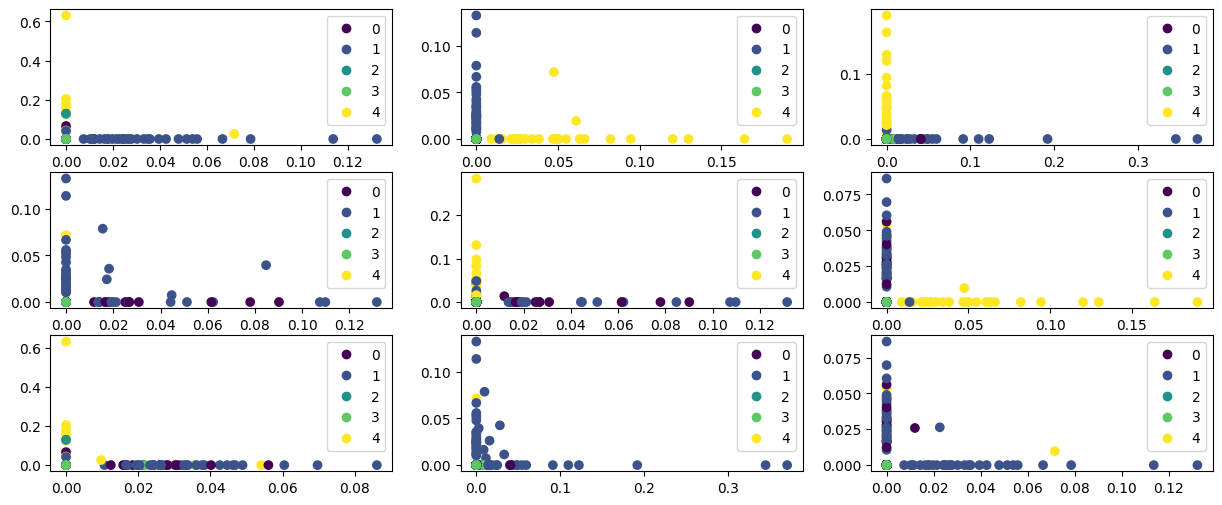

In [77]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,6))
for i in range(3):
  for j in range(3):
    plt.subplot(3, 3, 3 * i + j + 1)
    ij = plt.scatter(norm_ratings[:,np.random.randint(1, 9, size=1)],
                norm_ratings[:,np.random.randint(1, 9, size=1)],
                c = norm_clust_result)
    plt.legend(handles=ij.legend_elements()[0], labels=[str(i) for i in range(5)])


plt.show()

**Ответ:** И без восстановления названий признаков видно, что двумерное пространство не отражает в полной мере разделение на кластеры. Все таки мы работаем в многомерном.

Для визуализации данных высокой размерности существует метод t-SNE (стохастическое вложение соседей с t-распределением). Данный метод является нелинейным методом снижения размерности: каждый объект высокой размерности будет моделироваться объектов более низкой (например, 2) размерности таким образом, чтобы похожие объекты моделировались близкими, непохожие - далекими с большой вероятностью.

Примените `TSNE` из библиотеки `sklearn` и визуализируйте полученные объекты, покрасив их в цвета их кластеров

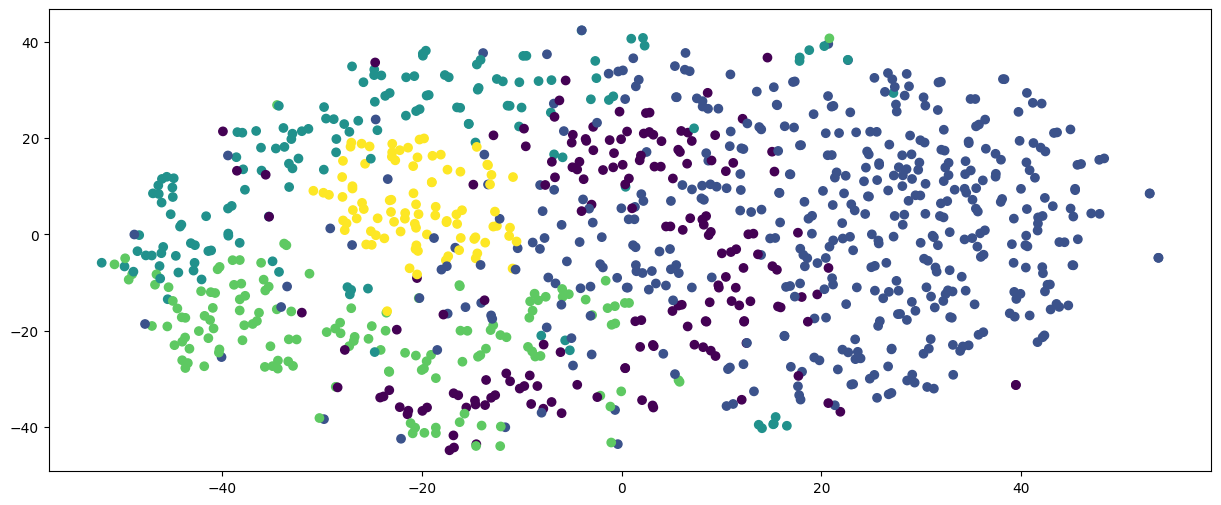

In [78]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=43)
ratings_tsne = tsne.fit_transform(norm_ratings)

plt.figure(figsize=(15, 6))
plt.scatter(ratings_tsne[:, 0], ratings_tsne[:, 1], c=norm_clust_result)
plt.show()

## Задание 7 (1 балл) Подбор гиперпараметров

Подберите оптимальное количество кластеров (максимум 100 кластеров) с использованием индекса Силуэта. Зафиксируйте `random_state=42`

In [79]:
from sklearn.metrics import silhouette_score

best_k, best_score = None, -1

for i in range(2, 100):
  cur_kmeans = KMeans(n_clusters=i, random_state=42)
  cur_res = cur_kmeans.fit(norm_ratings).predict(norm_ratings)
  if silhouette_score(norm_ratings, cur_res) > best_score:
    best_score = silhouette_score(norm_ratings, cur_res)
    best_k = i
print(best_k)

95


Выведите исполнителей, ближайших с центроидам (аналогично заданию 5). Как соотносятся результаты? Остался ли смысл кластеров прежним? Расскажите про смысл 1-2 интересных кластеров, если он изменился и кластеров слишком много, чтобы рассказать про все.

In [80]:
pd.set_option('display.max_rows', None)

best_clust = KMeans(n_clusters=95)
best_clust.fit(norm_ratings)

best_clust_result = best_clust.predict(norm_ratings)
best_centroids = best_clust.cluster_centers_

centroids = norm_clust.cluster_centers_

a = best_clust.cluster_centers_[best_clust_result, :]
b = norm_ratings

top10 = pd.DataFrame(np.hstack([best_clust_result.reshape(-1, 1),
                        (1 - (np.sum(a * b, axis=1)) / (norm(a, axis=1) * norm(b, axis=1))).reshape(-1, 1),
                        ratings.index.values.reshape(-1, 1)]),
             columns=["0", "1", "2"])
pd.DataFrame(top10.groupby("0").apply(lambda x: x["2"][x["1"].astype(float).nsmallest(10).index]))

2
0                                                   
0  573                                a fine frenzy2
   251                              ﻿sarah mclachlan
   435                                     frou frou
   719                                          pink
   993                                         jewel
   954                                 missy higgins
   462                             ingrid michaelson
   823                                   leona lewis
   487                                           sia
   481                           angels and airwaves
1  118                                   oy division
   40                                     the smiths
   768                                  gang of four
   178                                     new order
   761                                       bauhaus
   247                                     morrissey
   824                                          wire
   724                                    the cramps
   328                      the jesus and mary chain
   740                                       blondie
2  806                                little brother
   461                                   talib kweli
   133                              lupe the gorilla
   153                  the roots featuring d'angelo
   270                                       mos def
   128                                           nas
   167                                        common
   431                                      n.e.r.d.
   860                                         drake
   953                                          wale
3  468                                   hothot heat
   265                                     the kooks
   545                                 kaiser thiefs
   138                            the arctic monkeys
   349                                         ok go
   883                                phantom planet
   948                                    rx bandits
   987                                       old 97s
4  145                                band of horses
   646                       the american analog set
   572                                    rogue wave
   981                                  sun kil moon
   847                                  matt pond pa
   845                                        beulah
   552                                      calexico
   922                          manchester orchestra
   972                               coconut records
5  62                                           tool
   141                                perfect circle
   93                                           ratm
   36                                        incubus
   406                                        primus
   832                                         dredg
   939                                      shpongle
   664                                          ween
6  120                                massive attack
   90                                     portishead
   994                                          lamb
   786                    tricky & dj muggs & grease
   715                                 sneaker pimps
   201                                     goldfrapp
7  2                              deathcab for cutie
   11                                      the shins
   5                                  sufjan stevens
   47                             the postal service
   24                                    bright eyes
   22                               the decemberists
   28                                   ironand wine
   26                            belle and sebastian
   123                                     the stars
   4                                    modest mouse
8  440                                as i lay dying
   680                              all that remains
   445                                        atreyu
   770                 

**Ответ:** Смысл сохранился, остались жанры. 85 кластер легенда - Бах, Моцарт, Вивальди и ルートヴィヒ・ヴァン・ベートーヴェン

Сделайте t-SNE визуализацию полученной кластеризации.

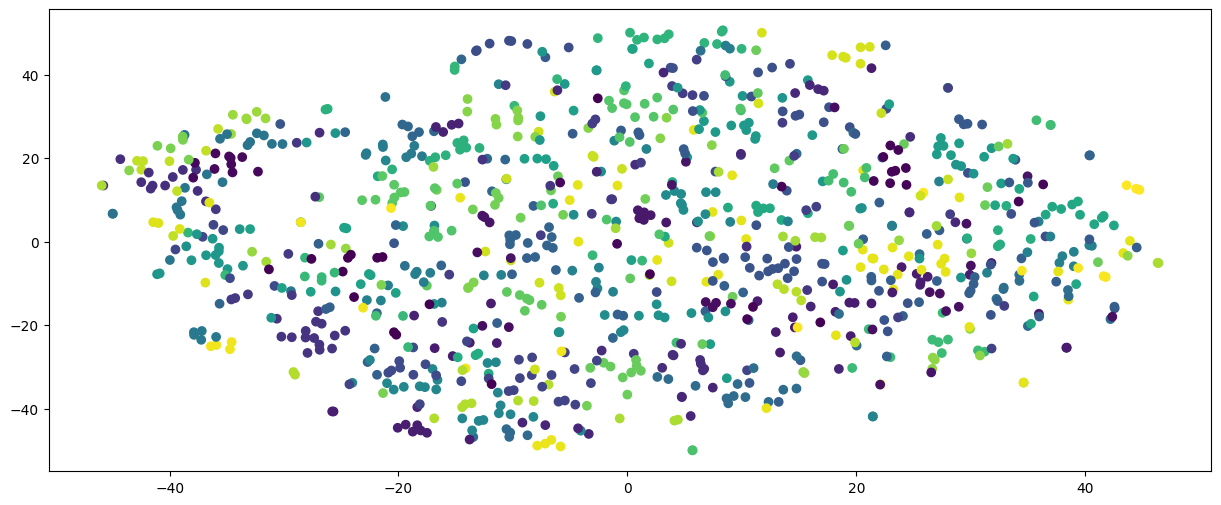

In [83]:
tsne = TSNE(n_components=2, random_state=42)
ratings_tsne = tsne.fit_transform(norm_ratings)

plt.figure(figsize=(15, 6))
plt.scatter(ratings_tsne[:, 0], ratings_tsne[:, 1], c=best_clust_result)
plt.show()

Если кластеров получилось слишком много и визуально цвета плохо отличаются, покрасьте только какой-нибудь интересный кластер из задания выше (`c = (labels == i)`). Хорошо ли этот кластер отражается в визуализации?

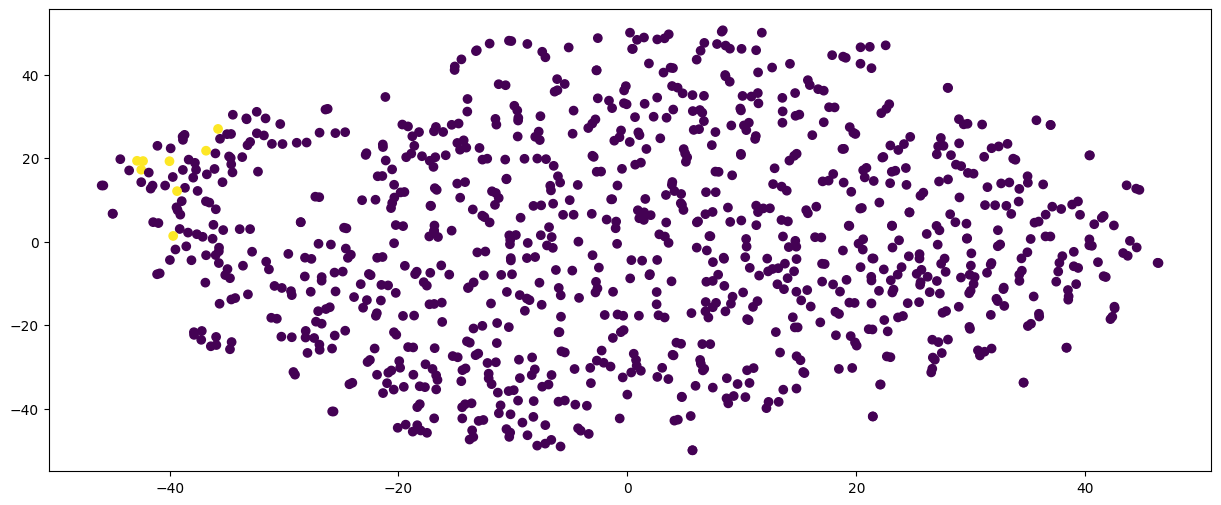

In [84]:
tsne = TSNE(n_components=2, random_state=42)
ratings_tsne = tsne.fit_transform(norm_ratings)

plt.figure(figsize=(15, 6))
plt.scatter(ratings_tsne[:, 0], ratings_tsne[:, 1], c=(best_clust_result == 85))
plt.show()

**Ответ:** Неидеально, но пойдет